# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries
import pandas as pd
import numpy as np

# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Hypertuning 
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics

# Splitting Data
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [3]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('./data/fashion-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [4]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [5]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [6]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)


(Sandal         646
 Trouser        612
 Ankle boot     605
 Shirt          601
 Pullover       598
 Coat           597
 T-shirt/top    590
 Dress          585
 Bag            584
 Sneaker        582
 Name: label, dtype: int64,
 Sandal         0.107667
 Trouser        0.102000
 Ankle boot     0.100833
 Shirt          0.100167
 Pullover       0.099667
 Coat           0.099500
 T-shirt/top    0.098333
 Dress          0.097500
 Bag            0.097333
 Sneaker        0.097000
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [7]:
# Grabs all of the columns 
columns = df.columns 

# Convert the all columns object into a regular list
columns = list(columns)

# Sanity check that it is now just a list.
print('[INFO]...Columns\' type is:', type(columns))

# Remove the label column from the list
columns.remove('label')

[INFO]...Columns' type is: <class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

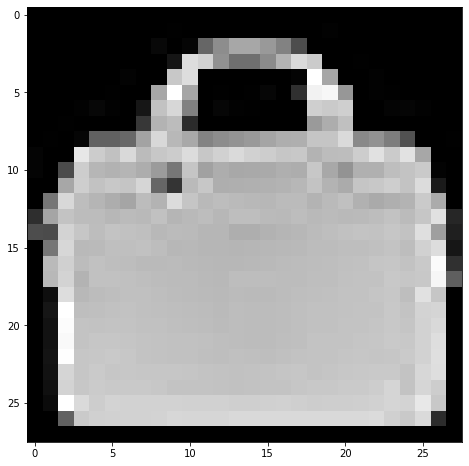

In [34]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[columns].values

# Select just one image from all the images
img = imgs[13]

# Reshape the image to be a 28x28 matrix (original format of image)
# type(img)
img = np.resize(img, (28, 28))

# Plot reshaped image
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [9]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns

# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print('Type of selected_features:', type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

Type of selected_features: <class 'list'>


### 2. Define our `X` and `y`

In [10]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [11]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [20]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
svm_model = svm.SVC(C=5)

In [21]:
# 2. Fit that model with our training data. 
svm_model.fit(X_train, y_train)

SVC(C=5)

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [22]:
### 1. Get and print a baseline accuracy score.
accuracy = svm_model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.862000


### 2. Make new predictions using our test data. 

In [23]:
### 2. Make new predictions using our test data. 
y_pred = svm_model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [24]:
### 3. Print the classification report. 
res = metrics.classification_report(y_test, y_pred)
print(res)

              precision    recall  f1-score   support

  Ankle boot       0.94      0.94      0.94       157
         Bag       0.96      0.96      0.96       147
        Coat       0.77      0.82      0.80       138
       Dress       0.84      0.89      0.86       149
    Pullover       0.77      0.85      0.81       154
      Sandal       0.92      0.94      0.93       160
       Shirt       0.75      0.56      0.64       158
     Sneaker       0.89      0.88      0.89       155
 T-shirt/top       0.77      0.84      0.80       128
     Trouser       0.99      0.95      0.97       154

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



### 4. Plot the confusion matrix of our predicted results. 

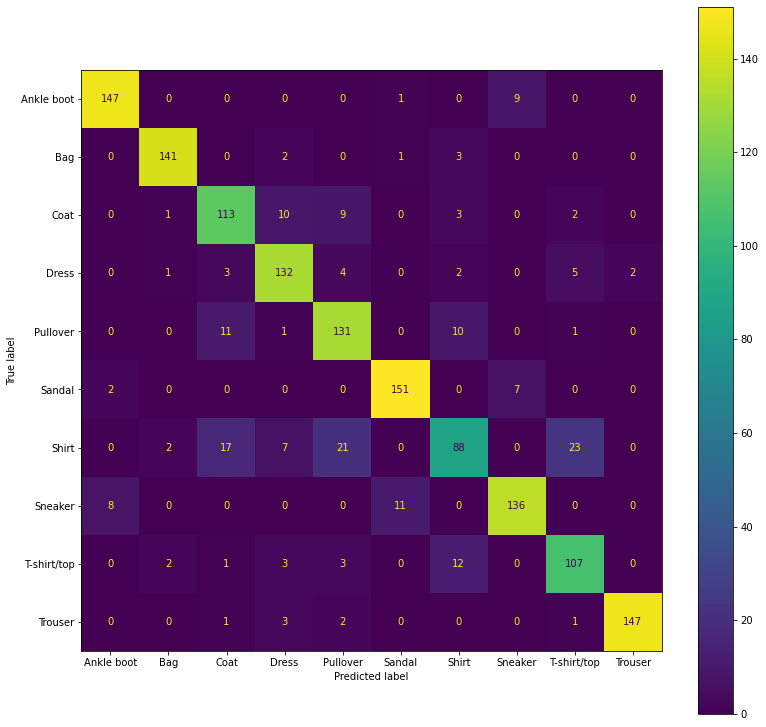

In [25]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(
    estimator=svm_model,
    X=X_test,
    y_true=y_test,
    ax=ax
)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [26]:
ans1 = 'T-shirt/top'
ans2 = 'Shirt'
print(f'The classifier mistaked {ans1} and {ans2} the most.')

The classifier mistaked T-shirt/top and Shirt the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [35]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

# @params :
#
def build_and_eval_model(model, X, y, random_state=23):
    print('Running report for model:', model)
    
    # Train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Train model
    model.fit(X_train, y_train)
    # Use model
    y_pred = model.predict(X_test)
    
    # Classification Report
    print(metrics.classification_report(y_test, y_pred))
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(13,13))
    metrics.plot_confusion_matrix(
        estimator=model, 
        X=X_test, 
        y_true=y_test,
        ax=ax
    )
    
    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model: LogisticRegression()
              precision    recall  f1-score   support

  Ankle boot       0.90      0.93      0.92       123
         Bag       0.92      0.89      0.91       119
        Coat       0.62      0.71      0.66       110
       Dress       0.85      0.78      0.81       121
    Pullover       0.74      0.75      0.75       126
      Sandal       0.94      0.92      0.93       130
       Shirt       0.61      0.57      0.59       131
     Sneaker       0.91      0.91      0.91       124
 T-shirt/top       0.75      0.80      0.77        92
     Trouser       0.97      0.94      0.95       124

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



/Users/xuejin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

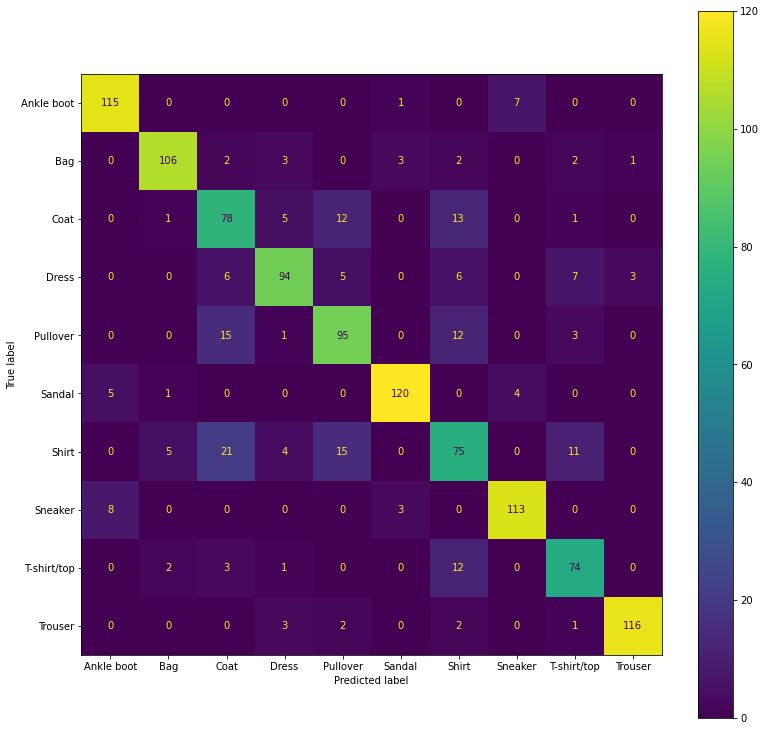

In [36]:
# LogisticRegression
lr_model = LogisticRegression()

build_and_eval_model(
    model=lr_model, 
    X=X,
    y=y,
    random_state=10
)

Running report for model: RandomForestClassifier()
              precision    recall  f1-score   support

  Ankle boot       0.93      0.96      0.94       123
         Bag       0.92      0.96      0.94       119
        Coat       0.72      0.76      0.74       110
       Dress       0.85      0.92      0.88       121
    Pullover       0.72      0.87      0.79       126
      Sandal       0.93      0.98      0.96       130
       Shirt       0.71      0.46      0.56       131
     Sneaker       0.94      0.87      0.90       124
 T-shirt/top       0.79      0.84      0.81        92
     Trouser       0.97      0.94      0.95       124

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



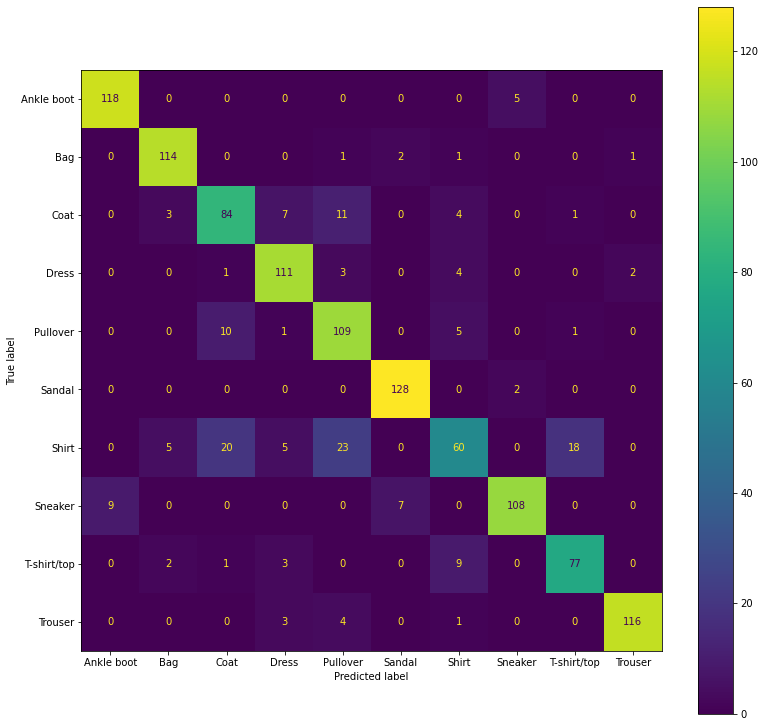

In [37]:
# RandomForest
rf_model = build_and_eval_model(
    model=RandomForestClassifier(),
    X=X,
    y=y,
    random_state=10
)

Running report for model: MultinomialNB()
              precision    recall  f1-score   support

  Ankle boot       0.67      0.87      0.76       123
         Bag       0.88      0.76      0.81       119
        Coat       0.45      0.61      0.52       110
       Dress       0.68      0.84      0.76       121
    Pullover       0.66      0.71      0.68       126
      Sandal       0.85      0.13      0.23       130
       Shirt       0.31      0.16      0.21       131
     Sneaker       0.59      0.94      0.72       124
 T-shirt/top       0.72      0.82      0.77        92
     Trouser       0.95      0.89      0.92       124

    accuracy                           0.66      1200
   macro avg       0.68      0.67      0.64      1200
weighted avg       0.68      0.66      0.63      1200



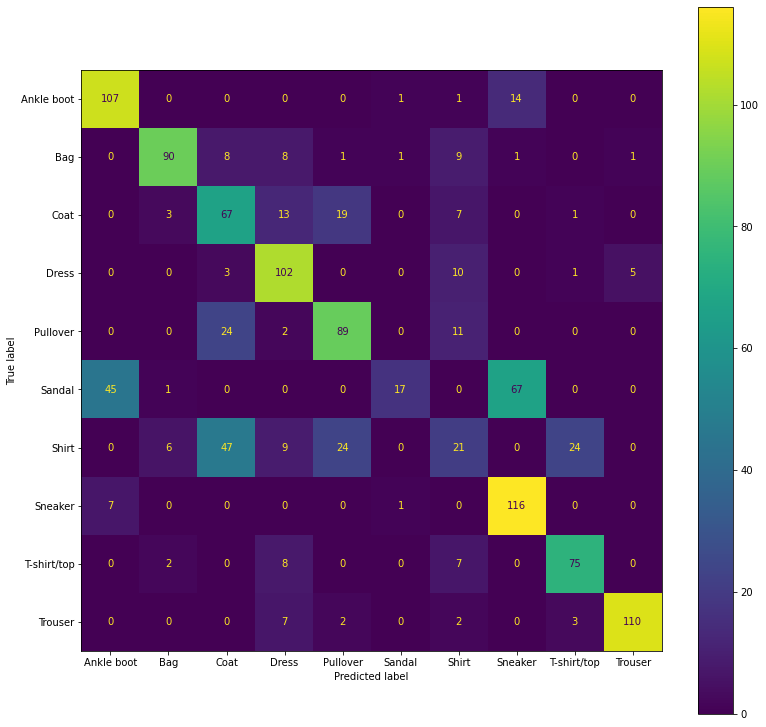

In [38]:
# MultinomialNB
mNB_model = build_and_eval_model(
    model=MultinomialNB(),
    X=X,
    y=y,
    random_state=10
)

In [39]:
print('SVM model did the best and multinomialNB model did the worst.')

SVM model did the best and multinomialNB model did the worst.


Running report for model: MLPClassifier()
              precision    recall  f1-score   support

  Ankle boot       0.87      0.93      0.90       123
         Bag       0.91      0.89      0.90       119
        Coat       0.58      0.65      0.61       110
       Dress       0.83      0.66      0.74       121
    Pullover       0.73      0.75      0.74       126
      Sandal       0.92      0.92      0.92       130
       Shirt       0.51      0.54      0.52       131
     Sneaker       0.87      0.85      0.86       124
 T-shirt/top       0.74      0.73      0.74        92
     Trouser       0.93      0.92      0.93       124

    accuracy                           0.79      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.79      0.79      1200



MLPClassifier()

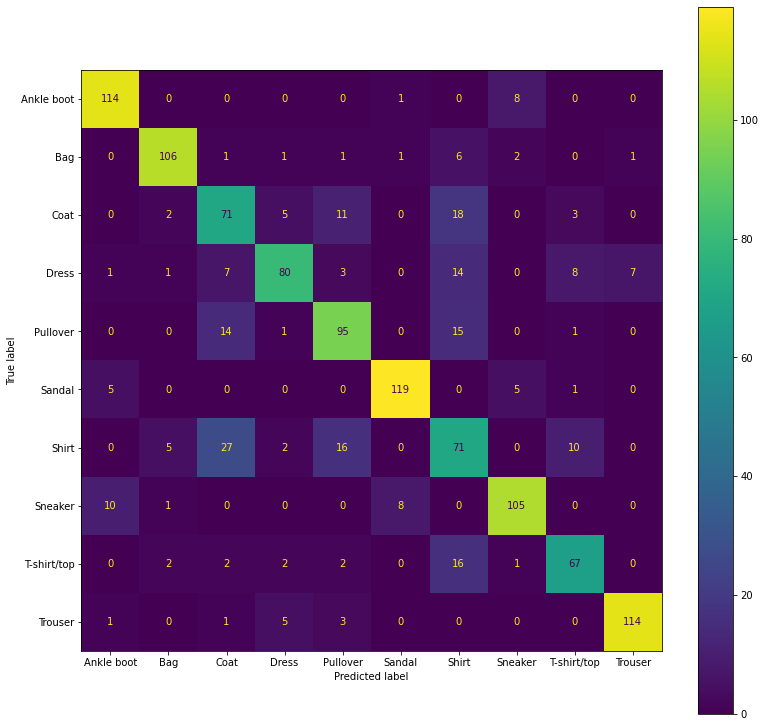

In [40]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf = build_and_eval_model(model=clf, X=X, y=y, random_state=10)

Pullover , Pullover


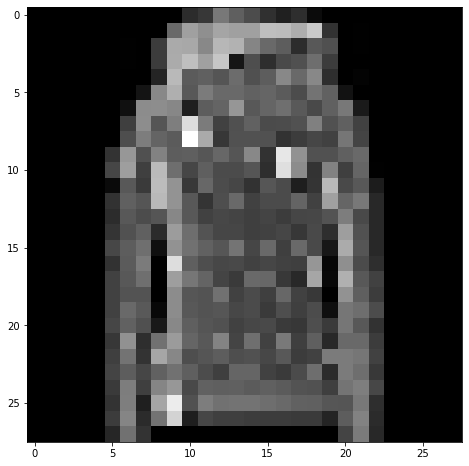

In [67]:

row = [X_train.iloc[0]]

plt.figure(figsize=(8,8))
plt.imshow(np.resize(row, (28, 28)), cmap='gray')

prediction = clf.predict(row)
actual = y_train.iloc[0]

print(f'{prediction[0]} , {actual}')